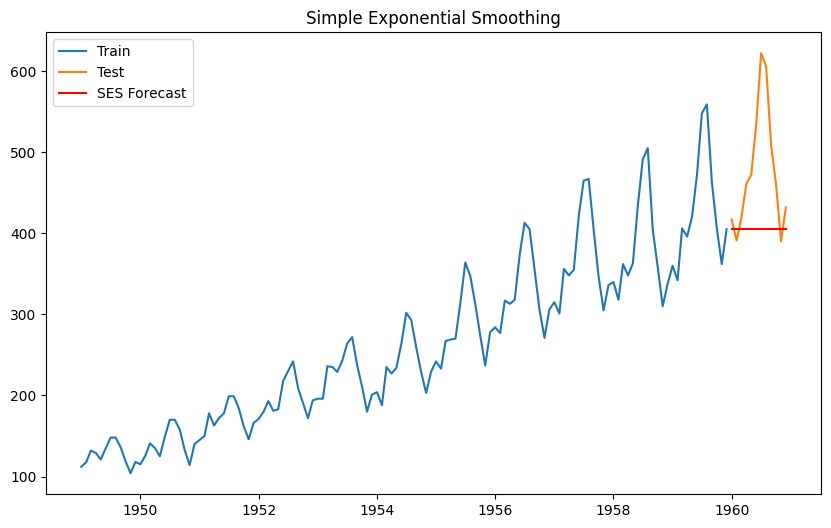

SES RMSE: 103.12


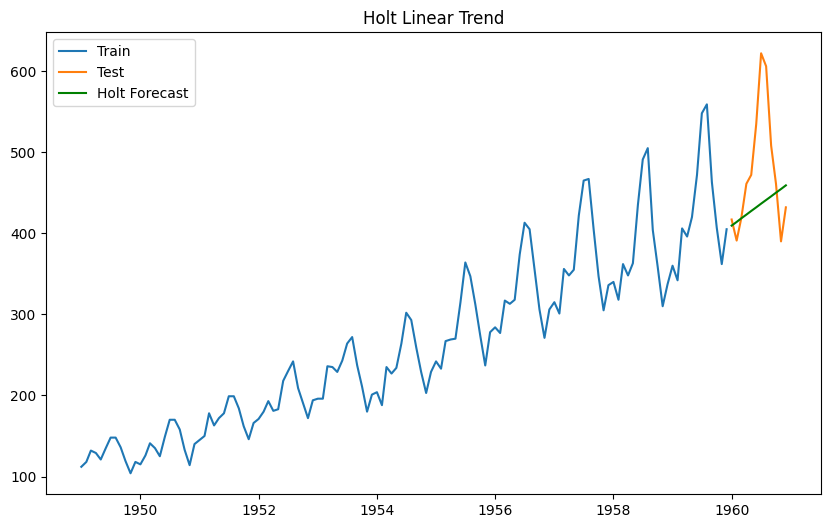

Holt RMSE: 84.23


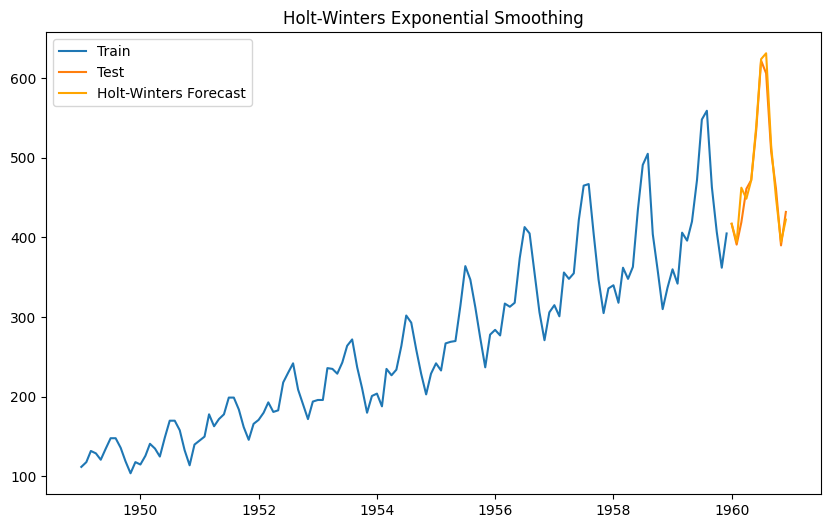

Holt-Winters RMSE: 15.81


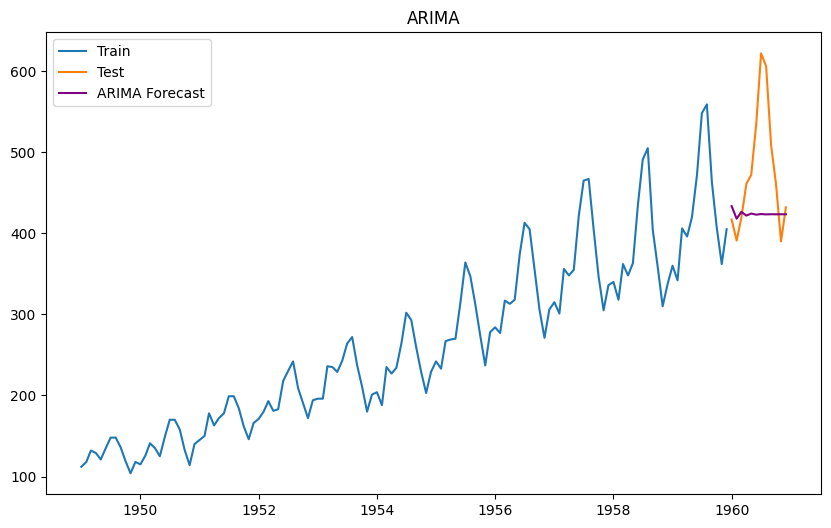

ARIMA RMSE: 91.23


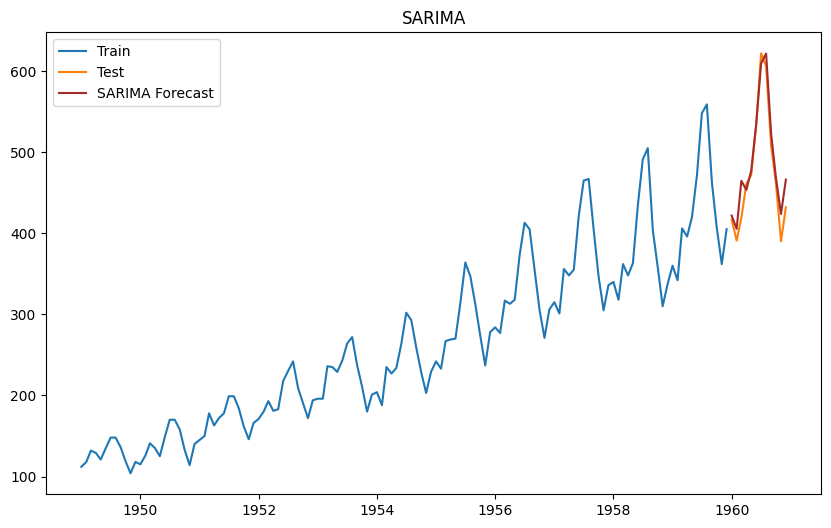

10:13:01 - cmdstanpy - INFO - Chain [1] start processing


SARIMA RMSE: 21.19


10:13:01 - cmdstanpy - INFO - Chain [1] done processing


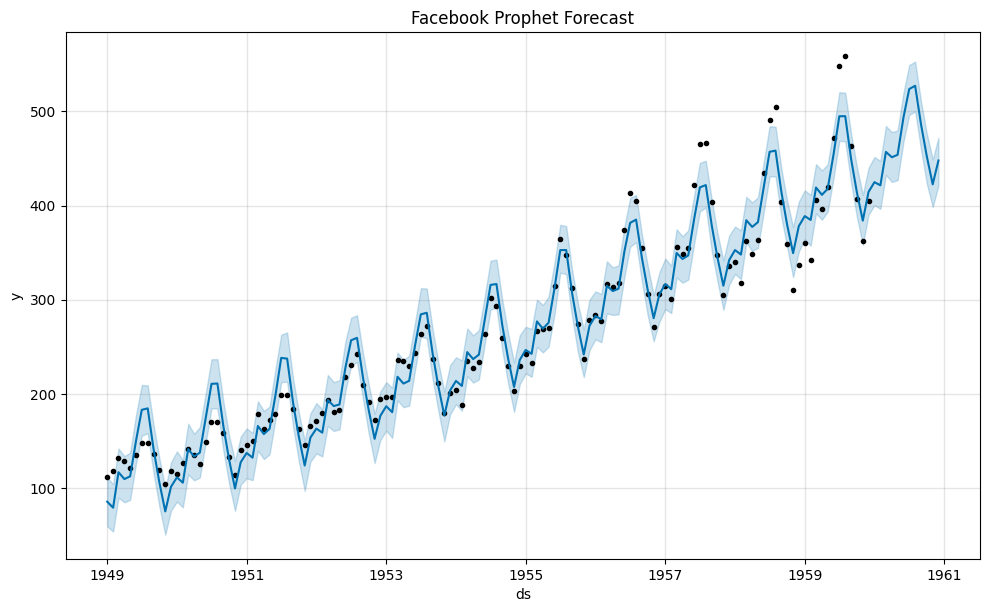

Prophet RMSE: 43.07
The best model based on RMSE is: Holt-Winters


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load and preprocess the AirPassengers dataset
df = pd.read_csv(r'C:\Users\Sunitha\Desktop\dataanalytics 6\New folder\AirPassengers old.csv', index_col='Month', parse_dates=True)
df.index.freq = 'MS'  # Set monthly frequency
y = df['#Passengers']  # Extract the target column (Passengers)

# Train-test split: Use data before 1960 for training, 1960 data for testing
train = y[:'1959']
test = y['1960':]

# Model 1: Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train).fit()
ses_forecast = ses_model.forecast(steps=len(test))

# Plot SES forecast vs actual data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, ses_forecast, label='SES Forecast', color='red')
plt.title('Simple Exponential Smoothing')
plt.legend()
plt.show()

# Calculate RMSE for SES
ses_rmse = np.sqrt(mean_squared_error(test, ses_forecast))
print(f'SES RMSE: {ses_rmse:.2f}')

# Model 2: Holt’s Linear Trend Model
holt_model = Holt(train).fit()
holt_forecast = holt_model.forecast(steps=len(test))

# Plot Holt's forecast vs actual data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, holt_forecast, label='Holt Forecast', color='green')
plt.title('Holt Linear Trend')
plt.legend()
plt.show()

# Calculate RMSE for Holt's Linear Trend Model
holt_rmse = np.sqrt(mean_squared_error(test, holt_forecast))
print(f'Holt RMSE: {holt_rmse:.2f}')

# Model 3: Holt-Winters Exponential Smoothing (with seasonal adjustment)
hw_model = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(steps=len(test))

# Plot Holt-Winters forecast vs actual data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, hw_forecast, label='Holt-Winters Forecast', color='orange')
plt.title('Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()

# Calculate RMSE for Holt-Winters
hw_rmse = np.sqrt(mean_squared_error(test, hw_forecast))
print(f'Holt-Winters RMSE: {hw_rmse:.2f}')

# Model 4: ARIMA Model (Autoregressive Integrated Moving Average)
arima_model = ARIMA(train, order=(1,1,1)).fit()
arima_forecast = arima_model.forecast(steps=len(test))

# Plot ARIMA forecast vs actual data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='purple')
plt.title('ARIMA')
plt.legend()
plt.show()

# Calculate RMSE for ARIMA
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(f'ARIMA RMSE: {arima_rmse:.2f}')

# Model 5: SARIMA (Seasonal ARIMA) Model
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
sarima_forecast = sarima_model.forecast(steps=len(test))

# Plot SARIMA forecast vs actual data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='brown')
plt.title('SARIMA')
plt.legend()
plt.show()

# Calculate RMSE for SARIMA
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
print(f'SARIMA RMSE: {sarima_rmse:.2f}')


from prophet import Prophet

# Prepare data for Prophet model
df_prophet = df.reset_index()
df_prophet.columns = ['ds', 'y']  # Rename columns for Prophet

# Train Prophet model on the training data only
prophet_model = Prophet()
prophet_model.fit(df_prophet[df_prophet['ds'] < '1960-01-01'])

# Create future dates for prediction (12 months into the future)
future_dates = prophet_model.make_future_dataframe(periods=12, freq='MS')

# Make forecast using Prophet
prophet_forecast = prophet_model.predict(future_dates)

# Plot Prophet forecast
prophet_model.plot(prophet_forecast)
plt.title('Facebook Prophet Forecast')
plt.show()

# Extract Prophet forecast for the test period
prophet_forecast_test = prophet_forecast.set_index('ds')['yhat']['1960-01-01':'1960-12-01']

# Calculate RMSE for Prophet
prophet_rmse = np.sqrt(mean_squared_error(test, prophet_forecast_test))
print(f'Prophet RMSE: {prophet_rmse:.2f}')

# Compare all model RMSE values and select the best model
rmse_results = {
    'SES': ses_rmse,
    'Holt': holt_rmse,
    'Holt-Winters': hw_rmse,
    'ARIMA': arima_rmse,
    'SARIMA': sarima_rmse,
    'Prophet': prophet_rmse
}

# Print out the model with the lowest RMSE
best_model = min(rmse_results, key=rmse_results.get)
print(f'The best model based on RMSE is: {best_model}')
